<a href="https://colab.research.google.com/github/vbddinho/puc_minas_machine/blob/main/M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
#Adicione o caminho do seu arquivo aqui.
file = "USA_Housing.csv"
input_df = pd.read_csv(file)

In [4]:
input_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def dataCleaning(self):
    self.df.dropna()

    
  def selectColumns(self):
    self.X = self.df[['Avg. Area Income', 'Avg. Area House Age',\
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', \
                     'Area Population']].values
    self.y = self.df['Price'].values

  def selectColumnsDF(self):
    self.df['Avg. Area Income'] = np.log(self.df['Avg. Area Income'])
    self.df['Avg. Area House Age'] = np.log(self.df['Avg. Area House Age'])
    self.df['Avg. Area Number of Rooms']  = np.log(self.df['Avg. Area Number of Rooms'])
    self.df['Avg. Area Number of Bedrooms']  = np.log(self.df['Avg. Area Number of Bedrooms'])
    self.df['Area Population']  = np.log(self.df['Area Population'])
    self.df = self.df[['Avg. Area Income', 'Avg. Area House Age',\
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', \
                     'Area Population','Price']].values
  

  def selectColumn(self):
    self.X = self.df['Avg. Area Income'].values
    self.y = self.df['Price'].values
    
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
  

In [7]:
pipeline = MachineLearningPipeline(input_df)
pipeline.dataCleaning()
pipeline.selectColumn()
pipeline.trainTestSplit()

# Regressão Univariável

In [8]:
pipeline.df[['Avg. Area Income','Price']]

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


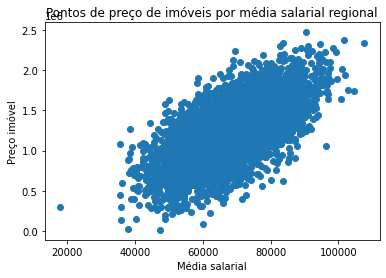

In [9]:
plt.scatter(pipeline.X,pipeline.y)
plt.title('Pontos de preço de imóveis por média salarial regional')
plt.xlabel('Média salarial')
plt.ylabel('Preço imóvel')
plt.show()

In [10]:
def plot_regression_line(x, y, theta0, theta1):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = theta0 + theta1*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

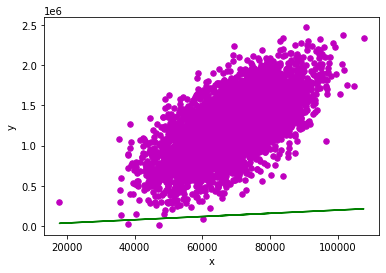

In [11]:
plot_regression_line(pipeline.X,pipeline.y,0,2)

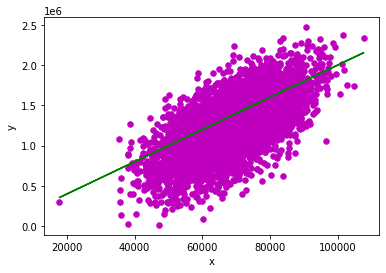

In [12]:
plot_regression_line(pipeline.X,pipeline.y,0,20)

In [13]:
def funcao_custo(theta0, theta1, X, y):
  m = len(X)
  elem = list(range(1,m))

  J = (1/2*m) * sum([(theta0 + theta1*X[i]) - y[i] for i in elem]) ** 2
  return J

In [14]:
def hypothesis(theta0, theta1, X):
    return theta0 + theta1*X

In [15]:
def gradient_descent(X, y, alpha, num_iteracoes):
  theta0 = 0
  theta1 = 0

  m = len(y)
  errors = []
  for i in range(0,num_iteracoes):
    h_theta = hypothesis(theta0, theta1, X)
    theta0 -= alpha*(sum(h_theta-y))/m
    theta1 -= alpha * (np.sum((h_theta - y) * X)/m)
    errors.append(funcao_custo(theta0, theta1, X, y))
  return theta0, theta1, errors

In [16]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.01, 50)

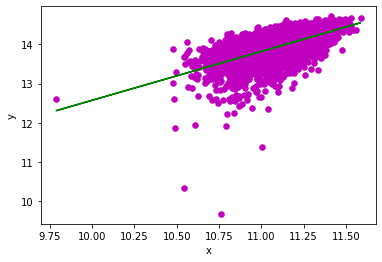

In [17]:
plot_regression_line(np.log(pipeline.X), np.log(pipeline.y),result[0],result[1])

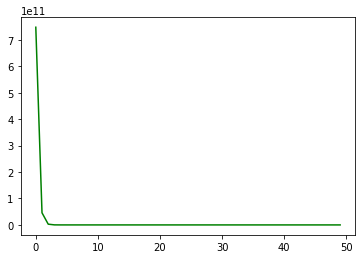

In [18]:
plt.plot(result[2], color = "g")

In [19]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.001, 50)

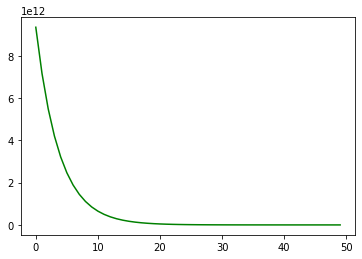

In [20]:
plt.plot(result[2], color = "g")